## 1. Objetivo



Objetivo do MVP: Analisar os produtos da plataforma de e-commerce Amazon, com foco na relação entre preço, desconto e avaliação dos usuários, para identificar os produtos mais vantajosos para os consumidores.

Perguntas de Negócio:
Qual é a relação entre o preço atual e o preço com desconto? Produtos com grandes descontos têm melhor avaliação?
Quais categorias de produtos possuem os maiores descontos e as melhores avaliações?
Qual é a média de avaliações por categoria?
Como o desconto impacta a avaliação do produto? 
Quais são os produtos mais populares, baseados no número de avaliações e no rating?


In [0]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas



# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-b04290bf-b041-4f96-ae0a-042dff35f075/bin/python -m pip install --upgrade pip' command.


## 2 - COLETA

A coleta do conjunto de dados foi feita do site Kaggle e foi utilizado o Amazon Sales Dataset.

In [0]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/amazon.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

In [0]:
# Mostra as primeiras linhas do dataset
dataset.head()



,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [0]:
dataset.shape # Mostra o número de linhas e colunas


Out[5]: (1465, 16)

In [0]:
%sql CREATE DATABASE IF NOT EXISTS bronze;

In [0]:
spark_df = spark.createDataFrame(dataset)
spark_df.write.mode("overwrite").saveAsTable("bronze.name_basics")

In [0]:
%sql SELECT * FROM bronze.name_basics LIMIT 10

product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1099.0,64.0,4.2,348.2177914110429,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,349.0,43.0,4.0,348.2177914110429,"Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZ

#3 - Modelagem de Dados
## 3.1 Catálogo de Dados


##Tabela de Fato: fact_product_reviews

A tabela de fato contém dados quantitativos, ou seja, as métricas que você deseja analisar.

Atributo	Tipo de Dado	Descrição	Valor Esperado	Domínio de Valores

product_id	VARCHAR(255)	Identificador único do produto.	Alfanumérico	Valor único por produto.

user_id	VARCHAR(255)	Identificador único do usuário que fez a avaliação.	Alfanumérico	Valor único por usuário.

discounted_price	DECIMAL(10,2)	Preço com desconto do produto.	Número decimal com 2 casas decimais.	Mínimo: 0. Máximo: depende do produto.

actual_price	DECIMAL(10,2)	Preço original (sem desconto) do produto.	Número decimal com 2 casas decimais.	Mínimo: 0. Máximo: depende do produto.

discount_percentage	DECIMAL(5,2)	Percentual de desconto aplicado ao produto.	Número decimal com até 2 casas decimais.	Mínimo: 0. Máximo: 100.

rating	DECIMAL(3,2)	Avaliação média do produto (de 1 a 5 estrelas).	Número decimal entre 1 e 5.	Mínimo: 1. Máximo: 5.

rating_count	INT	Quantidade de avaliações feitas para o produto.	Número inteiro positivo.	Mínimo: 0.

review_id	VARCHAR(255)	Identificador único da avaliação.	Alfanumérico	Valor único por avaliação.

##Tabela de Dimensão: dim_product

A tabela de dimensão contém dados descritivos dos produtos.

Atributo	Tipo de Dado	Descrição	Valor Esperado	Domínio de Valores

product_id	VARCHAR(255)	Identificador único do produto (chave primária).	Alfanumérico	Valor único por produto.

product_name	VARCHAR(1000)	Nome do produto.	Texto	String com nome do produto.

category	VARCHAR(255)	Categoria do produto, incluindo subcategorias.	Texto	String representando categoria.

about_product	STRING	Descrição detalhada do produto.	Texto	String com informações detalhadas do produto.

product_link	VARCHAR(255)	Link para a página do produto.	URL	URL válida do produto.

img_link	VARCHAR(255)	Link para a imagem do produto.	URL	URL válida da imagem do produto.

##Tabela de Dimensão: dim_user1

A tabela de dimensão contém dados descritivos sobre os usuários.

Atributo	Tipo de Dado	Descrição	Valor Esperado	Domínio de Valores
user_id	VARCHAR(255)	Identificador único do usuário.	Alfanumérico	Valor único por usuário.

user_name	VARCHAR(255)	Nome do usuário.	Texto	Nome do usuário.

##Tabela de Dimensão: dim_review
A tabela de dimensão contém detalhes das avaliações feitas pelos usuários.

Atributo	Tipo de Dado	Descrição	Valor Esperado	Domínio de Valores

review_id	VARCHAR(255)	Identificador único da avaliação.	Alfanumérico	Valor único por avaliação.

review_title	VARCHAR(1000)	Título da avaliação.	Texto	String com título da avaliação.

review_content	STRING	Conteúdo completo da avaliação.	Texto	String com conteúdo da avaliação.

Esquema Estrela
O modelo do esquema estrela é bem representado aqui:

Tabela de Fato: fact_product_reviews

Contém medidas como discounted_price, rating, rating_count, entre outras.

Tabelas de Dimensão:

dim_product: Descrição dos produtos.

dim_user1: Informações sobre os usuários.

dim_review: Detalhes das avaliações.


## 3.2 Linhagem dos Dados:

A linhagem de dados descreve a origem, o processo de transformação e o destino dos dados. 

Origem dos Dados:

Os dados foram extraídos do conjunto de dados da Amazon do site Kaggle, onde os produtos e as avaliações de usuários são coletados.

Processo de Transformação (ETL):

- Foram removidos valores nulos ou inválidos,
-  Os preços com símbolos monetários foram removidos e convertidos para o tipo float
- remoção de duplicados,   
- ajuste dos tipos de dados como conversões de string para float64.
- filtragem de dados de produtos
- Foram agrupados os dados por preço e rating
- Agrupamento por categoria e cálculo de preços 

Carregamento nos Data Warehouses:

Os dados transformados são carregados nas tabelas de dimensão (como dim_product, dim_user1, dim_review). As métricas quantitativas (como preços e avaliações) são carregadas na tabela de fato (fact_product_reviews).

Consultas e Análises:

A linhagem de dados facilita o rastreamento de como os dados foram transformados e de onde vieram. Isso garante que os dados usados nas análises sejam válidos e compreendidos.


## 3.3 Criação do modelo Esquema Estrela

In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/fact_product_reviews", True)


Out[9]: True

In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/dim_review", True)


Out[10]: True

In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/dim_product", True)


Out[11]: True

In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/dim_user1", True)


Out[12]: True

In [0]:
%sql
DROP TABLE IF EXISTS fact_product_reviews;
CREATE TABLE fact_product_reviews (
    product_id VARCHAR(255),
    user_id VARCHAR(255),
    discounted_price DECIMAL(10,2),
    actual_price DECIMAL(10,2),
    discount_percentage DECIMAL(5,2),
    rating DECIMAL(3,2),
    rating_count INT,
    review_id VARCHAR(255)
    
);


In [0]:
%sql
DROP TABLE IF EXISTS dim_product;
CREATE TABLE dim_product (
    product_id VARCHAR(255),
    product_name VARCHAR(1000),
    category VARCHAR(255),
    about_product STRING,
    product_link VARCHAR(255),
    img_link VARCHAR(255)
);


In [0]:
%sql
DROP TABLE IF EXISTS dim_user1;
CREATE TABLE dim_user1 (
    user_id VARCHAR(255),
    user_name VARCHAR(255)
);


In [0]:
%sql
DROP TABLE IF EXISTS dim_review;
CREATE TABLE dim_review (
    review_id VARCHAR(255),
    review_title VARCHAR(1000),
    review_content STRING
);


##ETL - Extração, Transformação e Carga

1. Extração - Os dados foram extraídos do conjunto de dados da Amazon do site Kaggle.

2. Transformação 
- Foram removidos os valores nulos das colunas 'ratings' e 'ratings_count' que foram tratados com a média
- Ajustes dos tipos de dados, com a conversão das colunas numéricas para float
- Remoção de caracteres especiais
- Filtragem de dados sobre os produtos
- Foram ordenados os dados por preço e rating
- Agrupamento por categoria e cálculo da média de preço com base na categoria

3. Carga
- Os dados transformados são carregados nas tabelas de dimensão (como dim_product, dim_user1, dim_review). As métricas quantitativas (como preços e avaliações) são carregadas na tabela de fato (fact_product_reviews).


##Documentação da transformação de dados

Algumas colunas numéricas foram tratadas como object o que dificultou a conversão para float. Quando o pandas lê uma coluna como object, ele pode ter dificuldades em tratar valores que contenham tanto texto quanto números ou símbolos. Isso ocorre porque o tipo object no pandas é utilizado para strings ou outros tipos misturados, como listas ou dicionários.Por isso, as colunas foram convertidas para  string (astype(str)) pois o pandas pode lidar melhor com a limpeza de dados, já que ele sabe que os dados são apenas texto.
A conversão para string foi uma forma de garantir que o pandas tratasse todas as entradas como strings, o que facilita a aplicação de funções como replace() para limpar os símbolos e vírgulas. Depois que a coluna foi convertida para string e os caracteres indesejados foram removidos, a conversão para float se tornou bem-sucedida porque os dados estavam mais consistentes.

Assim, as colunas numéricas que continham valores numericos e texto misturados foram convertidos para string. Usei o replace() com expressões regulares para remover ₹ e as vírgulas nas colunas de preços e rating_count. A função pd.to_numeric() é usada para converter as colunas para numérico. Com errors='coerce', valores que não podem ser convertidos (por exemplo, texto ou valores inválidos) serão convertidos para NaN.Foi realizada a conversão para float para realizar operações numéricas e plotar gráficos de maneira eficaz. Foram plotados histogramas para visualizar a distribuição de dados e também foram gerados gráficos de dispersão. Foram também verificados valores nulos na coluna ratings e rating count e foram tratados utilizando-se a média.
Usei dtypes para verificar se as colunas foram convertidas corretamente para float e eu usei pyspark para verificar os valores duplicados.Eu também ordenei os dados por preço e rating e agrupei por categoria para calcular a média de preço com base na categoria para preparar os dados de uma maneira que facilite a visualização e análise.


In [0]:
print(dataset.dtypes) # Verificar os tipos de dados das colunas

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [0]:
# Verificar os valores únicos na coluna 'actual_price'
valores_unicos = dataset['actual_price'].value_counts()
print(valores_unicos)

₹999      120
₹499       71
₹1,999     56
₹1,499     37
₹399       34
         ... 
₹931        1
₹3,599      1
₹420        1
₹9,625      1
₹3,690      1
Name: actual_price, Length: 449, dtype: int64


In [0]:
dataset['actual_price'] = dataset['actual_price'].astype(str) #Faz a conversão da coluna 'actual price' para string

In [0]:
dataset['discount_percentage'] = dataset['discount_percentage'].astype(str) #Faz a conversão da coluna 'discount_percentage' para string

In [0]:
dataset['discounted_price'] = dataset['discounted_price'].astype(str) #Faz a conversão da coluna 'discounted_price' para string

In [0]:


# Remover o símbolo da moeda (₹) e as vírgulas, e converter para float
dataset['discount_percentage'] = dataset['discount_percentage'].str.replace('%', '').astype(float)


In [0]:


# Remover o símbolo da moeda (₹) e as vírgulas, e converter para float
dataset['discounted_price'] = dataset['discounted_price'].str.replace(',', '').str.replace('₹', '').astype(float)


In [0]:


# Remover o símbolo da moeda (₹) e as vírgulas, e converter para float
dataset['actual_price'] = dataset['actual_price'].str.replace(',', '').str.replace('₹', '').astype(float)


In [0]:
# Verificar os valores únicos da coluna discounted_price
print(dataset['discounted_price'].unique)

<bound method Series.unique of 0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64>


In [0]:
# Converter a coluna rating em string
dataset['rating'] = dataset['rating'].astype(str)

In [0]:
# Converter a coluna rating_count em string
dataset['rating_count'] = dataset['rating_count'].astype(str)

In [0]:
# 1. Substituir valores vazios (ou valores inválidos) por NaN
dataset['rating_count'] = dataset['rating_count'].replace('', None)  # Substitui strings vazias por None

# 2. Converter para float e transformar valores inválidos (como strings não numéricas) em NaN
dataset['rating_count'] = pd.to_numeric(dataset['rating_count'], errors='coerce')

# 3. Agora, a coluna 'rating' está como tipo float e pode ser usada para plotar
print(dataset['rating_count'].dtypes)  # Verifique se a coluna 'rating' foi convertida para float

float64


In [0]:
# 1. Substituir valores vazios (ou valores inválidos) por NaN
dataset['rating_count'] = dataset['rating_count'].replace(',', '.').astype(float)  # Substitui strings vazias por None


In [0]:
# 1. Substituir valores vazios (ou valores inválidos) por NaN
dataset['rating'] = dataset['rating'].replace('', None)  # Substitui strings vazias por None

# 2. Converter para float e transformar valores inválidos (como strings não numéricas) em NaN
dataset['rating'] = pd.to_numeric(dataset['rating'], errors='coerce')

# 3. Agora, a coluna 'rating' está como tipo float e pode ser usada para plotar
print(dataset['rating'].dtypes)  # Verifique se a coluna 'rating' foi convertida para float

float64


In [0]:
print(dataset.isnull().sum()) ## Verifica a quantidade de valores nulos em cada coluna

product_id                0
product_name              0
category                  0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    1
rating_count           1139
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64


In [0]:
#Preencher os valores nulos da coluna rating com a média dos valores dessa coluna
dataset['rating'] = dataset['rating'].fillna(dataset['rating'].mean())


In [0]:
#Preencher os valores nulos da coluna rating_count com a média dos valores dessa coluna
dataset['rating_count'] = dataset['rating_count'].fillna(dataset['rating_count'].mean())

In [0]:

dataset['rating_count'] = dataset['rating_count'].fillna(dataset['rating'].mean())

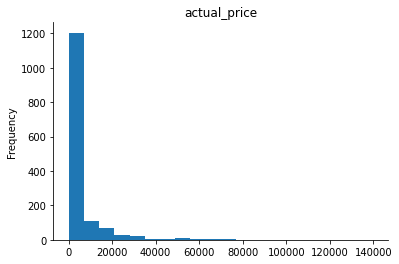

In [0]:

## Criação de um histograma para visualizar a distribuição dos dados da coluna actual_price

from matplotlib import pyplot as plt
dataset['actual_price'].plot(kind='hist', bins=20, title='actual_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

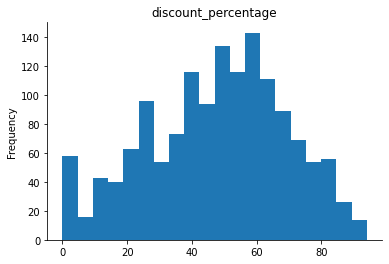

In [0]:

## Criação de um histograma para visualizar a distribuição dos dados da coluna discount_percentage

from matplotlib import pyplot as plt
dataset['discount_percentage'].plot(kind='hist', bins=20, title='discount_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

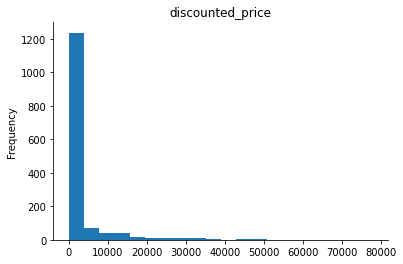

In [0]:

## Criação de um histograma para visualizar a distribuição dos dados da coluna discounted_price

from matplotlib import pyplot as plt
dataset['discounted_price'].plot(kind='hist', bins=20, title='discounted_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

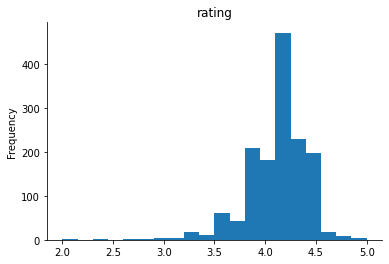

In [0]:
## Criação de um histograma para visualizar a distribuição dos dados da coluna rating

from matplotlib import pyplot as plt
dataset['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)


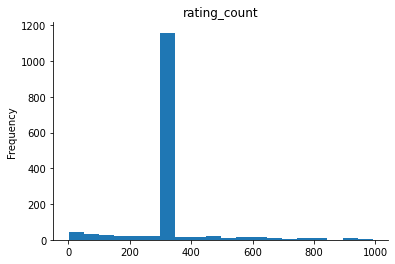

In [0]:
## Criação de um histograma para visualizar a distribuição dos dados da colunta rating_count

from matplotlib import pyplot as plt
dataset['rating_count'].plot(kind='hist', bins=20, title='rating_count')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [0]:
# Estatísticas descritivas
print(dataset['actual_price'].describe())

count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [0]:
# Estatísticas descritivas
print(dataset['discount_percentage'].describe())

count    1465.000000
mean       47.691468
std        21.635905
min         0.000000
25%        32.000000
50%        50.000000
75%        63.000000
max        94.000000
Name: discount_percentage, dtype: float64


In [0]:
# Calcular a correlação entre as colunas numéricas
correlation_matrix = dataset.corr()

print(correlation_matrix)

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.120337      0.121639            -0.155261   
rating_count                -0.002623     -0.004480            -0.008029   

                       rating  rating_count  
discounted_price     0.120337     -0.002623  
actual_price         0.121639     -0.004480  
discount_percentage -0.155261     -0.008029  
rating               1.000000      0.072817  
rating_count         0.072817      1.000000  


O preço com desconto e o preço real estão altamente correlacionados, o que é esperado pois o preço com desconto é uma redução do preço original. A correlação negativa entre o preço com desconto e a porcentagem de desconto é relativamente fraca. Um preço mais baixo com desconto não implica diretamente em uma porcentagem de desconto maior e vice-versa. Existe uma correlação fraca entre a avaliação e o número de avaliações. Isso significa que o número de avaliações não tem uma grande influência sobre a avaliação média, indicando que, independentemente de quantas pessoas avaliaram o produto, a média das avaliações pode variar de maneira independente.A correlação entre avaliação e porcentagem de desconto é fraca e negativa. Isso sugere que produtos com descontos maiores não necessariamente têm avaliações mais baixas ou mais altas. 


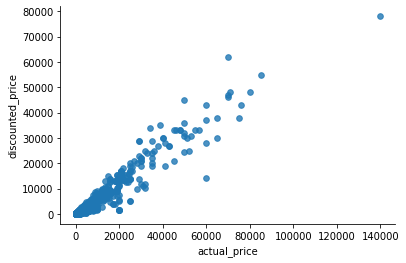

In [0]:

## Gráfico de dispersão gerado com as colunas actual_price e discounted_price

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='actual_price', y='discounted_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [0]:
%sql CREATE DATABASE silver;

In [0]:

# Criando a sessão do Spark
spark = SparkSession.builder.appName('PandasToSpark').getOrCreate()

# Converter o Pandas DataFrame para Spark DataFrame
spark_df1 = spark.createDataFrame(dataset)

# Verificar o DataFrame Spark
spark_df1.show(5)

spark_df1.write.mode("overwrite").saveAsTable("silver.name_basics")

+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|product_id|        product_name|            category|discounted_price|actual_price|discount_percentage|rating|     rating_count|        about_product|             user_id|           user_name|           review_id|        review_title|      review_content|            img_link|        product_link|
+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|B07JW9H4J1|Wayona Nylon Brai...|Computers&Accesso...|           399.0|      1099.0|               64.0

In [0]:
# Identificando duplicados, agrupando por colunas
duplicados = spark_df1.groupBy("user_id", "actual_price", "discounted_price").count().filter("count > 1")

# Exibindo os resultados
duplicados.show()


+--------------------+------------+----------------+-----+
|             user_id|actual_price|discounted_price|count|
+--------------------+------------+----------------+-----+
|AF7IXQKBUL6NEIQG4...|       395.0|           199.0|    2|
|AHVZCQP5SYIVGZJK4...|       700.0|           219.0|    3|
|AF6SKHWKK53BMAI6U...|       699.0|           263.0|    2|
|AF477BP57JM7Z4JD4...|       999.0|           199.0|    2|
|AGH3POHLPXABF3I4A...|      1499.0|           348.0|    2|
|AF2IRSQZKMBGX44YD...|      1900.0|           899.0|    3|
|AEQ2YMXSZWEOHK2EH...|      1000.0|           149.0|    2|
|AFYR53OTBUX2RNAKU...|       399.0|           299.0|    2|
|AHIKJUDTVJ4T6DV6I...|       249.0|           139.0|    2|
|AGMJ6TDLOVZIR5ZU6...|       800.0|           269.0|    2|
|AFNYIBWKJLJQKY4BG...|      1799.0|           970.0|    3|
|AE3Q6KSUK5P75D5HF...|       399.0|           154.0|    3|
|AH3ZH5IE4MTFB3T33...|       999.0|           339.0|    2|
|AF2XXVO7JUBUVAOBT...|       399.0|           159.0|    

In [0]:
# Filtrar produtos com preço abaixo de ₹500
spark_df1_filtered = spark_df1.filter(col('actual_price') < 500)

spark_df1_filtered.show(5)


+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|product_id|        product_name|            category|discounted_price|actual_price|discount_percentage|rating|     rating_count|       about_product|             user_id|           user_name|           review_id|        review_title|      review_content|            img_link|        product_link|
+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|B098NS6PVG|Ambrane Unbreakab...|Computers&Accesso...|           199.0|       349.0|               43.0|  

In [0]:
# Filtrar produtos com desconto acima de 50%
spark_df1_filtered = spark_df1.filter(col('discount_percentage') > 50)
spark_df1_filtered.show()

+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|product_id|        product_name|            category|discounted_price|actual_price|discount_percentage|rating|     rating_count|        about_product|             user_id|           user_name|           review_id|        review_title|      review_content|            img_link|        product_link|
+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|B07JW9H4J1|Wayona Nylon Brai...|Computers&Accesso...|           399.0|      1099.0|               64.0

In [0]:
# Ordenar os dados por preço e rating
sorted_df = spark_df1.orderBy(col('discounted_price').desc(), col('rating').desc())

sorted_df.show(5)


+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|product_id|        product_name|            category|discounted_price|actual_price|discount_percentage|rating|     rating_count|       about_product|             user_id|           user_name|           review_id|        review_title|      review_content|            img_link|        product_link|
+----------+--------------------+--------------------+----------------+------------+-------------------+------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|B09WN3SRC7|Sony Bravia 164 c...|Electronics|HomeT...|         77990.0|    139900.0|               44.0|  

In [0]:
# Agrupar por categoria e calcular a média do preço com base na categoria
avg_price_by_category = spark_df1.groupBy('category').avg('discounted_price')

avg_price_by_category.show(5)


+--------------------+---------------------+
|            category|avg(discounted_price)|
+--------------------+---------------------+
|Electronics|HomeT...|    872.6666666666666|
|Electronics|HomeT...|   24840.190476190477|
|Electronics|HomeT...|    663.6666666666666|
|Computers&Accesso...|    722.1111111111111|
|Electronics|HomeA...|                349.0|
+--------------------+---------------------+
only showing top 5 rows



In [0]:
%sql SELECT * FROM silver.name_basics LIMIT 10

product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1099.0,64.0,4.2,348.2177914110429,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,349.0,43.0,4.0,348.2177914110429,"Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZ

In [0]:
%sql SELECT COUNT(*) FROM silver.name_basics

count(1)
1465


In [0]:
%sql
SELECT product_id, AVG(rating) AS average_rating
FROM silver.name_basics
GROUP BY product_id
ORDER BY average_rating DESC;


#4. Análise
## a. Qualidade de dados
A análise da qualidade de dados tem como objetivo verificar se o conjunto de dados está adequado para análise e se os dados estão limpos e prontos para responder as perguntas de negócios

##Documentação da qualidade de dados

O objetivo dessa etapa é analisar a qualidade de dados para identificar e corrigir possíveis problemas, como valores nulos, duplicados ou inconsistências. Isso assegura que as análises sejam baseadas em dados confiáveis.

Foram verificados valores nulos nas colunas ratings e rating_count que foram preenchidos com a média. verifiquei valores duplicados com pyspark mas que não foram considerados fora do padrão pois repetições de registros, preços com desconto e a presença de vários registros de um mesmo usuário são comuns em dados de comércio eletrônico.Foram verificados símbolos especiais como símbolos montários, vírgulas e símbolo da porcentagem que foram removidos para possibilitar a conversão para float.  Verifiquei a consistência de dados com o dtype para garantir que não houvesse erros de tipo que poderiam prejudicar a análise, com o objetivo de garantir que cada coluna tenha o tipo de dado correto, o que é fundamental para a realização de análises precisas. Foi feita a estatística descritiva para entender a distribuição de dados e realizei a análise da correlação entre as variáveis. Foram também plotados gráficos para identificar a distribuição de dados e a correlação entre as variáveis. 

In [0]:
print(dataset.isnull().sum()) ## Verifica a quantidade de valores nulos em cada coluna

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [0]:
print(dataset.dtypes)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [0]:
%sql CREATE DATABASE IF NOT EXISTS gold;

## 5. Carga de dados no Data Warehouse

In [0]:

spark_df1 = spark.createDataFrame(dataset)
spark_df1.write.mode("overwrite").saveAsTable("gold.name_basics")

# Inserir dados na tabela fact_product_reviews
spark.sql("""
    INSERT INTO fact_product_reviews (product_id, user_id, discounted_price, actual_price, discount_percentage, rating, rating_count, review_id)
    SELECT product_id, user_id, discounted_price, actual_price, discount_percentage, rating, rating_count, review_id
    FROM gold.name_basics
""")

# Inserir dados na tabela dim_product
spark.sql("""
    INSERT INTO dim_product (product_id, product_name, category, about_product, product_link, img_link)
    SELECT product_id, product_name, category, about_product, product_link, img_link
    FROM gold.name_basics;
""")

# Inserir dados na tabela dim_user1
spark.sql("""
    INSERT INTO dim_user1 (user_id, user_name)
    SELECT DISTINCT user_id, user_name
    FROM gold.name_basics;
""")

# Inserir dados na tabela dim_review
spark.sql("""
    INSERT INTO dim_review (review_id, review_title, review_content)
    SELECT DISTINCT review_id, review_title, review_content
    FROM gold.name_basics;
""")

print("Dados carregados com sucesso nas tabelas fact_product_reviews dim_product, dim_user1 e dim_review.")

Dados carregados com sucesso nas tabelas fact_product_reviews dim_product, dim_user1 e dim_review.


## Selecionar os títulos das revisões onde a classificaçaõ é maior que 4

In [0]:

%sql
SELECT dr.review_title
FROM dim_review dr
JOIN fact_product_reviews fpr ON dr.review_id = fpr.review_id
WHERE fpr.rating > 4;

review_title
"awesome,Good product,Product reviews ...,Best in budget,Very good according to price,Nice product data transmission rate is 80 to 85MB/s,Works well. East to install HDD in this. Will recommend,Very nice product and easy install & use"
"Hassle free bagless vacuum cleaner | No more of maintaining/cleaning/replacing bags,Nice little vacuum cleaner but with a couple of drawbacks.,Simple and Effective,A,On the heavier side but satisfied with the product,Good quality, heavy noise,Great Product!,Awesome Cleaning Machine"
"Excellent to Use, Adequate Cord length but Too Expensive compared with other & Hope for Durability.,Easy to handle, hassle free,Good,Nice product 👍,Good product,Overall good product,Product not working more than 6months. At that time 797 rs now 999 rs. Too much,Not Shock proof at all"
"All fine but the cord is too short,Good quality,Great quality go and buy...,Stand nahi hota hai gir jata hai,Good iron at this price,Awesome,There was one scratch on the surface which was hide under the sticker,Superb quality"
"Decent product.,Good,Good quality,It is original hp 65w chrger,Right product,100% authentic,Good Quality,Decent"
"Does the stated purpose,Good,Good,Steam Iron,Light weight and easy to use iron,Functional & hard to Use,Overall a good product,Using it for a month. So far it is working well."
"Good & attractive,Very versatile,Good,Good Product....,Good night light at 5Volt.,Pretty good product,Good,Nice bt it should be in direct plug not in usb"
"It's working,It's gud 😳,Cable quality is good.,Durable and Works Well,Good data cable same as shown in pic,Portronics knonnect L 1.2 mtr Micro USB cable,Ok,Great quality"
"It's working,It's gud 😳,Cable quality is good.,Durable and Works Well,Good data cable same as shown in pic,Portronics knonnect L 1.2 mtr Micro USB cable,Ok,Great quality"
"Great for smoothies and shakes,Very good products,Very nice portable and easy to wash blender,Good product,Great build quality,Good,This item made my day,Good product"


##Procurar por nome de produtos na tabela dim_product com a palavra 'Iphone'

In [0]:

%sql 
    SELECT * 
    FROM dim_product 
    WHERE product_name LIKE '%Iphone%';




product_id,product_name,category,about_product,product_link,img_link
B09W5XR9RT,"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"1.2M Tangle Free durable tough braiding sync & charge cable|Supports iOS devices with max output up to 2.4A|Ensure fast and stable data transmission up to 480 Mbps|Up to 10,000+ bend and 10,000+ plugging and unplugging test ensure this cable a longer lifespan|Compatible designed to work flawlessly with MFi or apple devices, iPhone, iMac, iPad etc.|2 Years Warranty",https://www.amazon.in/Duracell-Lightning-Certified-Braided-Charging/dp/B09W5XR9RT/ref=sr_1_219?qid=1672903006&s=computers&sr=1-219,https://m.media-amazon.com/images/I/4177nw8okbL._SX300_SY300_QL70_FMwebp_.jpg
B07XLCFSSN,"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Fast Charge: When Used With An 18W Or Higher Usb-C Wall Charger With Power Delivery You Can Charge Your Iphone To 50% Battery In Just 30 Minutes - Supported Models Include Iphone 8, 8 Plus, X, Xs, Xr, Xs Max, 11, 11 Pro, 11 Pro Max, Ipads, And More. High-Speed Data Transfer: Up To 480 Mbps For Transferring Music, Movies, And More In Seconds|Durable Friendly Design: Built With Top Rated Materials And Tested To Withstand Up To X Bend Cycles And Features Textured Grooves On Connector Ends For Improved Grip|Certified Chip: Apple Mfi Certified Charging And Syncing Cable For Your Apple Devices With Improved Chipset To Ensure Full Compatibility|This Cable Is Not Compatible With Standard Usb Chargers / Laptop Ports. Works Only With Type C Adapters And Laptop Ports. Please Check The Port Of Your Adapter Before Buying The Cable.|Connector Type: Usb Type C",https://www.amazon.in/AmazonBasics-Apple-Certified-Lightning-Charging/dp/B07XLCFSSN/ref=sr_1_279?qid=1672903008&s=computers&sr=1-279,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/3183iGEWksL._SX300_SY300_QL70_FMwebp_.jpg
B09C6HXFC1,"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Supports Ios Devices With Max Output Up To 2.4A|Up To 10, 000+ Bend And 10, 000+ Plugging And Unplugging Test Ensure This Cable A Longer Lifespan|Ensure Fast And Stable Data Transmission Up To 480 Mbps|2 Years Warranty|Compatible Designed To Work Flawlessly With Mfi Or Apple Devices, Iphone, Imac, Ipad Etc|1.2M Tangle Free Durable Tough Braiding Sync & Charge Cable",https://www.amazon.in/DURACELL-Lightning-Certified-braided-Devices/dp/B09C6HXFC1/ref=sr_1_22?qid=1672909124&s=electronics&sr=1-22,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/41TZJiPRRwL._SX300_SY300_QL70_FMwebp_.jpg
B09W5XR9RT,"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"1.2M Tangle Free durable tough braiding sync & charge cable|Supports iOS devices with max output up to 2.4A|Ensure fast and stable data transmission up to 480 Mbps|Up to 10,000+ bend and 10,000+ plugging and unplugging test ensure this cable a longer lifespan|Compatible designed to work flawlessly with MFi or apple devices, iPhone, iMac, iPad etc.|2 Years Warranty",https://www.amazon.in/Duracell-Lightning-Certified-Braided-Charging/dp/B09W5XR9RT/ref=sr_1_32?qid=1672909125&s=electronics&sr=1-32,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/4177nw8okbL._SX300_SY300_QL70_FMwebp_.jpg
B07XLCFSSN,"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast C

##Procurar por nomes de produtos na tabela dim_product com a palavra 'Gamepad'

In [0]:


%sql
SELECT * 
FROM dim_product 
WHERE product_name LIKE '%Gamepad%';




product_id,product_name,category,about_product,product_link,img_link
B0756CLQWL,"Redgear Pro Wireless Gamepad with 2.4GHz Wireless Technology, Integrated Dual Intensity Motor, Illuminated Keys for PC(Compatible with Windows 7/8/8.1/10 only)",Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Gamepads,"Gamepad comes equipped with2.4GHz wireless technology and supports up to 10 metres range, an ideal choice for those looking to enjoy your favourite games without the hassle of cables and wires.|The built-in lithium-ion battery in the gamepad can provide uninterrupted gameplay for up to 2 hours in a single charge for upto 30-minute|Integrated dual intensity motor which allows a realistic gaming experience.|Integrated force feedback. Reset : When an exception occurs, such as Keys disorder, or crash, unable to connect. Remove the USB connection from the gamepad and device and reconnect.|The gamepad comes with illuminated keys on the back which light up and allow visibility even in low light conditions.|1 year warranty from the date of purchase",https://www.amazon.in/Redgear-Pro-Wireless-Gamepad-Black/dp/B0756CLQWL/ref=sr_1_162?qid=1672903002&s=computers&sr=1-162,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/41n2MqMIH5L._SX300_SY300_QL70_FMwebp_.jpg


#Perguntas de Negócio

##Qual é a relação entre o preço atual e o preço com desconto?


In [0]:
%sql
SELECT AVG(actual_price) AS media_preco_atual, AVG(discounted_price) AS media_preco_desconto
FROM fact_product_reviews;

media_preco_atual,media_preco_desconto
5444.990635,3125.310874


Essa consulta calcula a média dos preços atuais e com desconto, fornecendo uma visão geral da relação entre eles. O valor de 5444.990635 representa a média dos preços originais dos produtos e indica que, em média, os produtos na plataforma têm um preço original de aproximadamente 5445 unidades monetárias.O valor de 3125.310874 representa a média dos preços dos produtos após a aplicação de descontos.Isso indica que, em média, os produtos são vendidos por aproximadamente 3125 unidades monetárias após os descontos.A diferença entre a média do preço atual e a média do preço com desconto mostra que, em média, os produtos têm um desconto significativo. Isso sugere que os descontos desempenham um papel importante na estratégia de preços da plataforma.

Quais categorias de produtos possuem os maiores descontos e as melhores avaliações?

In [0]:
%sql
SELECT dp.category, AVG(fpr.discount_percentage) AS media_desconto, AVG(fpr.rating) AS media_avaliacao
FROM dim_product dp
JOIN fact_product_reviews fpr ON dp.product_id = fpr.product_id
GROUP BY dp.category
ORDER BY media_desconto DESC, media_avaliacao DESC;

category,media_desconto,media_avaliacao
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.000000,4.400000
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.000000,4.020000
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.000000,3.800000
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.000000,3.900000
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.500000,3.400000
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts,82.000000,4.100000
Computers&Accessories|Components|InternalHardDrives,80.000000,4.200000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.500000,4.150000
Electronics|Mobiles&Accessories|MobileAccessories|Stands,76.400000,4.160000
"Electronics|Headphones,Earbuds&Accessories|Cases",76.000000,4.300000


Os resultados mostram que os descontos variam significativamente entre as categorias de produtos.
Os percentuais de desconto variam amplamente entre as categorias, desde 90% até produtos sem desconto. Isso sugere que as estratégias de desconto são diferentes para cada tipo de produto. Categorias de eletrônicos e acessórios tendem a ter os maiores descontos, enquanto categorias de materiais de escritório tendem a ter os menores. A análise dos descontos pode fornecer insights sobre as estratégias de preços, a concorrência no mercado e o ciclo de vida dos produtos.


##Qual é a média de avaliações por categoria?

In [0]:
%sql
SELECT dp.category, AVG(fpr.rating) AS media_avaliacao
FROM dim_product dp
JOIN fact_product_reviews fpr ON dp.product_id = fpr.product_id
GROUP BY dp.category;

category,media_avaliacao
Computers&Accessories|Accessories&Peripherals|HardDriveAccessories|Caddies,4.100000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|WireboundNotebooks",4.400000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|CompositionNotebooks",4.371429
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers,3.800000
Computers&Accessories|ExternalDevices&DataStorage|ExternalMemoryCardReaders,4.300000
Computers&Accessories|Accessories&Peripherals|TabletAccessories|ScreenProtectors,4.180000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Headsets,4.033333
Health&PersonalCare|HomeMedicalSupplies&Equipment|HealthMonitors|WeighingScales|DigitalBathroomScales,4.000000
"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|LintShavers",4.036364


As médias de avaliação variam de 3.30 a 4.60, indicando que a satisfação dos clientes varia significativamente entre as categorias de produtos.Categorias de acessórios de computador, como tablets, tendem a ter avaliações muito boas.
Produtos relacionados a materiais de pintura e organização elétrica também apresentam altas avaliações.
Acessórios de memoria e produtos relacionados a rede, tambem tendem a ter uma boa avaliação.Produtos de áudio, como headsets e torres de som, tendem a ter avaliações mais baixas. Produtos de cozinha específicos, como moedores de café elétricos, também apresentam avaliações mais baixas. Acessórios 3d para televisões, tambem tendem a ter uma baixa avaliação.

##Como o desconto impacta a avaliação do produto? Produtos com maiores descontos têm avaliações mais altas?

In [0]:
%sql
SELECT fpr.discount_percentage, AVG(fpr.rating) AS media_avaliacao
FROM fact_product_reviews fpr
GROUP BY fpr.discount_percentage
ORDER BY fpr.discount_percentage;

discount_percentage,media_avaliacao
0.00,4.240816
2.00,4.500000
3.00,4.200000
4.00,4.200000
5.00,4.300000
6.00,3.950000
7.00,4.200000
8.00,4.000000
9.00,4.200000
10.00,4.160000


Conclusão:

Os resultados sugerem que o percentual de desconto tem um impacto limitado na média de avaliação dos produtos. Mesmo com produtos sem descontos, a média de avaliação é de 4.24, o que é relativamente alto. Com descontos muito altos, como 90%, a média de avaliação é de 3.98, que ainda é uma avaliação razoável, mas chega a ter uma menor avaliação que os produtos sem desconto. Isso indica que o desconto não é o principal fator que influencia a avaliação.Outros fatores, como a qualidade do produto e a marca, provavelmente têm um impacto maior.
É importante considerar outros fatores e realizar análises adicionais para obter uma compreensão mais completa da relação entre desconto e avaliação.

##Quais são os produtos mais populares, baseados no número de avaliações e no rating?

In [0]:
%sql
SELECT DISTINCT dp.product_name, fpr.rating, fpr.rating_count
FROM dim_product dp
JOIN fact_product_reviews fpr ON dp.product_id = fpr.product_id
ORDER BY fpr.rating_count DESC, fpr.rating DESC
LIMIT 10;

product_name,rating,rating_count
"Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)",4.10,992
Eveready Red 1012 AAA Batteries - Pack of 10,4.30,989
"Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)",3.70,976
"Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)",4.30,974
"Zoul USB Type C Fast Charging 3A Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31s M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (1M, Grey)",4.30,974
"Bajaj New Shakti Neo Plus 15 Litre 4 Star Rated Storage Water Heater (Geyser) with Multiple Safety System, White",3.90,959
Hindware Atlantic Xceed 5L 3kW Instant Water Heater with Copper Heating Element and High Grade Stainless Steel Tank,3.90,942
Crypo™ Universal Remote Compatible with Tata Sky Universal HD & SD Set top Box (Also Works with All TV),3.80,928
"iBELL Castor CTEK15L Premium 1.5 Litre Stainless Steel Electric Kettle,1500W Auto Cut-Off Feature,Silver",4.10,925
"Ambrane Fast 100W Output Cable with Type-C to Type-C for Mobile, Laptop, Macbook & Table Charging, 480mbps Data Sync Speed, Braided Cable, 1.5m Length (ABCC-100, Black-Grey)",4.20,919




A lista apresenta uma variedade de produtos, incluindo aspirador de carro, baterias, chaleira elétrica, cabos de carregamento, aquecedores de água, controle remoto e um cabo de carregamento para dispositivos de alta potência. Isso indica uma ampla gama de interesses e necessidades dos consumidores. Todos os produtos têm um número significativo de avaliações, variando de 919 a 992. Isso demonstra que esses produtos são populares e amplamente utilizados. A maioria dos produtos tem avaliações acima de 4.0, indicando um alto nível de satisfação dos clientes. Apenas dois produtos estão com avaliação abaixo de 4.0, o aquecedor de agua da bajaj, e o controle remoto. As descrições dos produtos fornecem informações detalhadas sobre suas características e funcionalidades, o que é útil para os consumidores tomarem decisões de compra informadas.

Autoavaliação:

Ao concluir o trabalho, acredito que consegui atingir os objetivos principais que defini no início do projeto. O foco estava em entender a relação entre preço, desconto e avaliação dos produtos na plataforma de e-commerce Amazon, e, ao longo da análise, obtive insights valiosos sobre essas variáveis. Consegui calcular a média dos preços originais e com desconto, o que permitiu observar que, em média, os produtos têm descontos significativos. Esse foi um ponto importante para entender a estratégia de precificação da Amazon. Realizamos uma análise dos descontos por categoria, destacando que produtos de diferentes categorias possuem políticas de descontos bastante variadas. Isso abriu caminho para um entendimento das estratégias de preços da plataforma, dependendo do tipo de produto. Também analisei as médias de avaliação por categoria de produto, identificando que a satisfação dos consumidores varia significativamente. Categorias como acessórios de computador e eletrônicos tiveram as melhores avaliações, enquanto produtos de áudio e cozinha receberam avaliações mais baixas.

Durante a análise dos dados, percebi que, apesar dos descontos serem relevantes, eles não são os únicos fatores que afetam as avaliações. Em alguns casos, como os produtos com descontos muito altos, a média de avaliação foi ligeiramente inferior à de produtos sem desconto, o que indica que outras variáveis poderiam estar influenciando essas avaliações.
Outro desafio foi a diferenciação das categorias de produtos, especialmente em categorias amplas como "acessórios", onde as subcategorias podem ter características muito distintas. Isso fez com que algumas análises se tornassem mais complexas do que o esperado.

Para enriquecer a análise, seria interessante aprofundar a investigação sobre as relações entre outros fatores e as avaliações, como a marca, a qualidade do produto e a frequência de compra. Isso ajudaria a entender melhor como esses aspectos influenciam a percepção do consumidor.Outra análise relevante seria a segmentação dos dados por tipo de consumidor, por exemplo, consumidores que compram frequentemente e consumidores ocasionais, para ver como a lealdade à marca ou a experiência do usuário impacta as avaliações.

O trabalho ajudou a entender as relações entre preço, desconto e avaliação, embora haja espaço para expandir a análise com mais variáveis. A descoberta de que o desconto não é o fator determinante para as avaliações reforça a importância de considerar uma gama mais ampla de fatores ao analisar o comportamento do consumidor em plataformas de e-commerce. Esse projeto contribuiu para o meu entendimento de estratégias de preços e mostrou como é possível usar dados para entender melhor o comportamento do consumidor.



